In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from prophet import Prophet

import warnings
warnings.filterwarnings('ignore')

In [20]:
df=pd.read_csv('/content/covid_19_clean_complete (1) (1).csv')

In [21]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [22]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [23]:
len(df)

49068

In [24]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [25]:
df['Date'] = pd.to_datetime(df['Date'])

In [26]:
df.rename(columns={'Country/Region':'country',
    'Date':'date',
    'Province/State':'state',
    'Confirmed':'confirmed',
    'Deaths':'deaths',
    'Recovered':'recovered',
    'Active':'active'},inplace=True)

In [27]:
df.columns

Index(['state', 'country', 'Lat', 'Long', 'date', 'confirmed', 'deaths',
       'recovered', 'active', 'WHO Region'],
      dtype='object')

In [28]:
pd.set_option('display.max_rows',None)

In [41]:
# creating a dataframe with only active, confirmed, deaths, recovered,country for the first day 22nd Jan 2020

top_firstday = df[df['date']==df['date'].min()]
new_df_firstday = top_firstday.groupby('country')['confirmed','recovered','active','deaths'].sum().reset_index()

# Using plotly.express to create the plot

fig = px.choropleth(new_df_firstday,
                    locations='country',
                    locationmode='country names',
                    color='confirmed',
                    hover_name='country',
                    hover_data={'confirmed': True, 'active': True, 'recovered': True, 'deaths': True},
                    range_color=[1, 50000],
                    color_continuous_scale='Peach',
                    title='Total Number of Confirmed, Acive, Recovered and Deaths - Country-wise on 22nd Jan'
)

# Customizing the hover template
fig.update_traces(hovertemplate='<b>%{hovertext}</b><br>' +
                                 'Confirmed: %{customdata[0]:,.0f}<br>' +
                                 'Active: %{customdata[1]:,.0f}<br>' +
                                 'Recovered: %{customdata[2]:,.0f}<br>' +
                                 'Deaths: %{customdata[3]:,.0f}<extra></extra>'
)

# Show the plot
fig.show()

In [38]:
# creating a dataframe with only active, confirmed, deaths, recovered,country for the last day 27th July 2020

top_lastday = df[df['date']==df['date'].max()]
new_df_lastday = top_lastday.groupby('country')['confirmed','recovered','active','deaths'].sum().reset_index()

# Using plotly.express to create the plot

fig = px.choropleth(new_df_lastday,
                    locations='country',
                    locationmode='country names',
                    color='confirmed',
                    hover_name='country',
                    hover_data={'confirmed': True, 'active': True, 'recovered': True, 'deaths': True},
                    range_color=[1, 50000],
                    color_continuous_scale='Peach',
                    title='Total Number of Confirmed, Acive, Recovered and Deaths - Country-wise on 27th July'
)

# Customizing the hover template
fig.update_traces(hovertemplate='<b>%{hovertext}</b><br>' +
                                 'Confirmed: %{customdata[0]:,.0f}<br>' +
                                 'Active: %{customdata[1]:,.0f}<br>' +
                                 'Recovered: %{customdata[2]:,.0f}<br>' +
                                 'Deaths: %{customdata[3]:,.0f}<extra></extra>'
)

# Show the plot
fig.show()

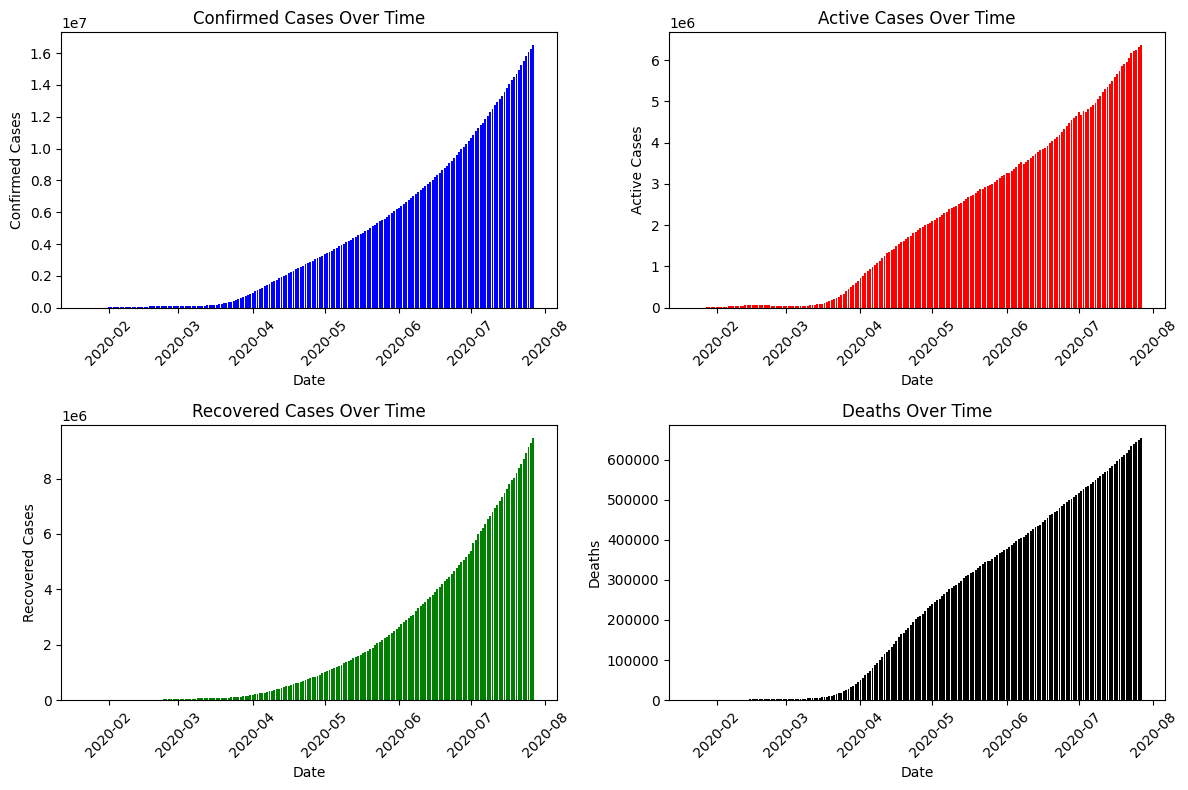

In [33]:
# Grouping by 'date' and summing the cases
df_datewise = df.groupby('date').sum().reset_index()

# Plotting separate bar charts for each category using Matplotlib
plt.figure(figsize=(12, 8))

# Confirmed Cases
plt.subplot(2, 2, 1)
plt.bar(df_datewise['date'], df_datewise['confirmed'], color='blue')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed Cases Over Time')
plt.xticks(rotation=45)

# Active Cases
plt.subplot(2, 2, 2)
plt.bar(df_datewise['date'], df_datewise['active'], color='red')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.title('Active Cases Over Time')
plt.xticks(rotation=45)

# Recovered Cases
plt.subplot(2, 2, 3)
plt.bar(df_datewise['date'], df_datewise['recovered'], color='green')
plt.xlabel('Date')
plt.ylabel('Recovered Cases')
plt.title('Recovered Cases Over Time')
plt.xticks(rotation=45)

# Deaths
plt.subplot(2, 2, 4)
plt.bar(df_datewise['date'], df_datewise['deaths'], color='black')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Deaths Over Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

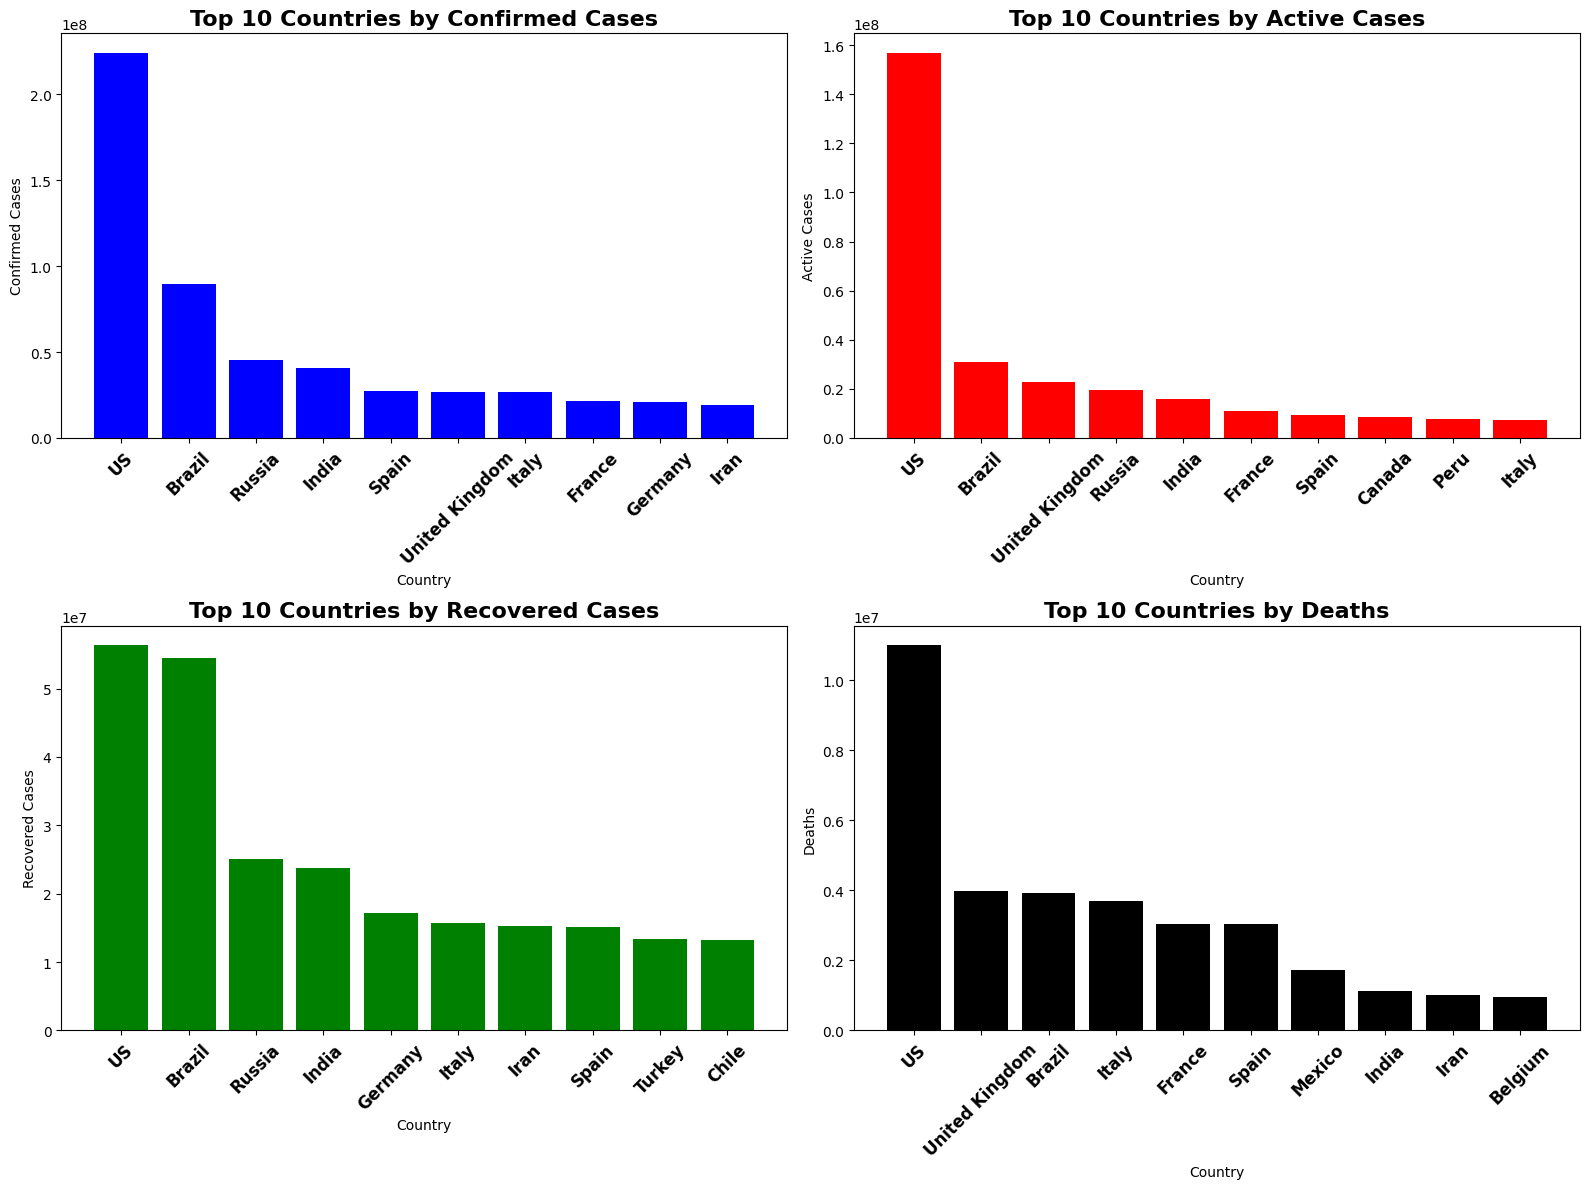

In [34]:
# Grouping by 'country' and summing the cases
df_countrywise = df.groupby('country').sum().reset_index()

# Finding top 10 countries for each category
top_10_confirmed = df_countrywise.sort_values(by='confirmed', ascending=False).head(10)
top_10_active = df_countrywise.sort_values(by='active', ascending=False).head(10)
top_10_recovered = df_countrywise.sort_values(by='recovered', ascending=False).head(10)
top_10_deaths = df_countrywise.sort_values(by='deaths', ascending=False).head(10)

# Plotting separate bar charts for top 10 countries in each category using Matplotlib
plt.figure(figsize=(16, 12))

# Confirmed Cases
plt.subplot(2, 2, 1)
plt.bar(top_10_confirmed['country'], top_10_confirmed['confirmed'], color='blue')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.title('Top 10 Countries by Confirmed Cases',fontweight='bold',fontsize=16)
plt.xticks(rotation=45,fontsize=12, fontweight='bold')

# Active Cases
plt.subplot(2, 2, 2)
plt.bar(top_10_active['country'], top_10_active['active'], color='red')
plt.xlabel('Country')
plt.ylabel('Active Cases')
plt.title('Top 10 Countries by Active Cases',fontweight='bold', fontsize=16)
plt.xticks(rotation=45,fontsize=12, fontweight='bold')

# Recovered Cases
plt.subplot(2, 2, 3)
plt.bar(top_10_recovered['country'], top_10_recovered['recovered'], color='green')
plt.xlabel('Country')
plt.ylabel('Recovered Cases')
plt.title('Top 10 Countries by Recovered Cases',fontweight='bold',fontsize=16)
plt.xticks(rotation=45,fontsize=12, fontweight='bold')

# Deaths
plt.subplot(2, 2, 4)
plt.bar(top_10_deaths['country'], top_10_deaths['deaths'], color='black')
plt.xlabel('Country')
plt.ylabel('Deaths')
plt.title('Top 10 Countries by Deaths',fontweight='bold',fontsize=16)
plt.xticks(rotation=45,fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


In [35]:
# Calculating the total sum for each category
total_confirmed = df['confirmed'].sum()
total_active = df['active'].sum()
total_recovered = df['recovered'].sum()
total_deaths = df['deaths'].sum()

# Creating a DataFrame for the pie chart
data = {'Category': ['Confirmed', 'Active', 'Recovered', 'Deaths'],
        'Total': [total_confirmed, total_active, total_recovered, total_deaths]}

df_pie = pd.DataFrame(data)

# Creating the pie chart using Plotly
fig = px.pie(df_pie, values='Total', names='Category', title='Percentage Share of COVID-19 Cases')

fig.show()

#### **Forecasting using Fbprophet :**

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvjf7x_75/6q8s21ht.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvjf7x_75/z_arfwyd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24249', 'data', 'file=/tmp/tmpvjf7x_75/6q8s21ht.json', 'init=/tmp/tmpvjf7x_75/z_arfwyd.json', 'output', 'file=/tmp/tmpvjf7x_75/prophet_modelzt7u8xls/prophet_model-20240324121129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:11:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:11:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Forecast Data for Confirmed:
           ds      yhat  yhat_lower  yhat_upper
0  2020-07-28  16320199    16157192    16490263
1  2020-07-29  16529972    16377516    16696530
2  2020-07-30  16743908    16579080    16911701
3  2020-07-31  16959097    16790050    17122496
4  2020-08-01  17166757    16990330    17324038
5  2020-08-02  17364296    17199765    17529580
6  2020-08-03  17558885    17381014    17746084
7  2020-08-04  17748132    17558104    17924578
8  2020-08-05  17957905    17755360    18159974
9  2020-08-06  18171841    17968850    18388424
10 2020-08-07  18387030    18156024    18602264
11 2020-08-08  18594690    18337989    18850130
12 2020-08-09  18792229    18502299    19085248
13 2020-08-10  18986818    18685387    19285514


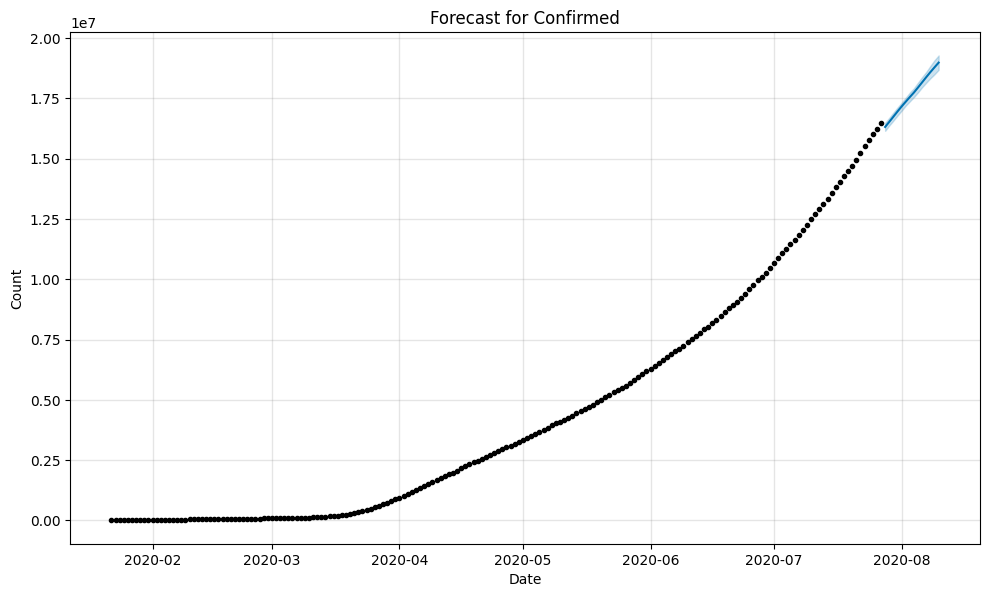

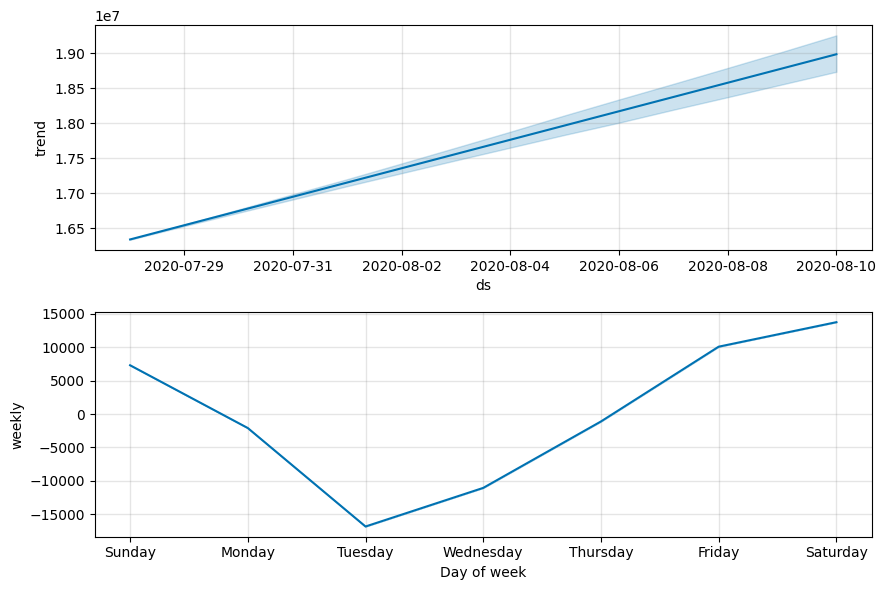

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvjf7x_75/d_3mgs6o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvjf7x_75/pcxidza6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19036', 'data', 'file=/tmp/tmpvjf7x_75/d_3mgs6o.json', 'init=/tmp/tmpvjf7x_75/pcxidza6.json', 'output', 'file=/tmp/tmpvjf7x_75/prophet_modeluyoaep4g/prophet_model-20240324121131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:11:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:11:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Forecast Data for Active:
           ds     yhat  yhat_lower  yhat_upper
0  2020-07-28  6353415     6288115     6424867
1  2020-07-29  6415814     6346079     6486144
2  2020-07-30  6481273     6411562     6549089
3  2020-07-31  6549315     6482954     6619925
4  2020-08-01  6611479     6534731     6689431
5  2020-08-02  6678771     6605996     6753495
6  2020-08-03  6732521     6654639     6811706
7  2020-08-04  6789287     6702777     6874080
8  2020-08-05  6851686     6769995     6943058
9  2020-08-06  6917145     6821700     7018939
10 2020-08-07  6985187     6884429     7096956
11 2020-08-08  7047351     6933281     7162593
12 2020-08-09  7114643     6974538     7249391
13 2020-08-10  7168392     7032422     7306593


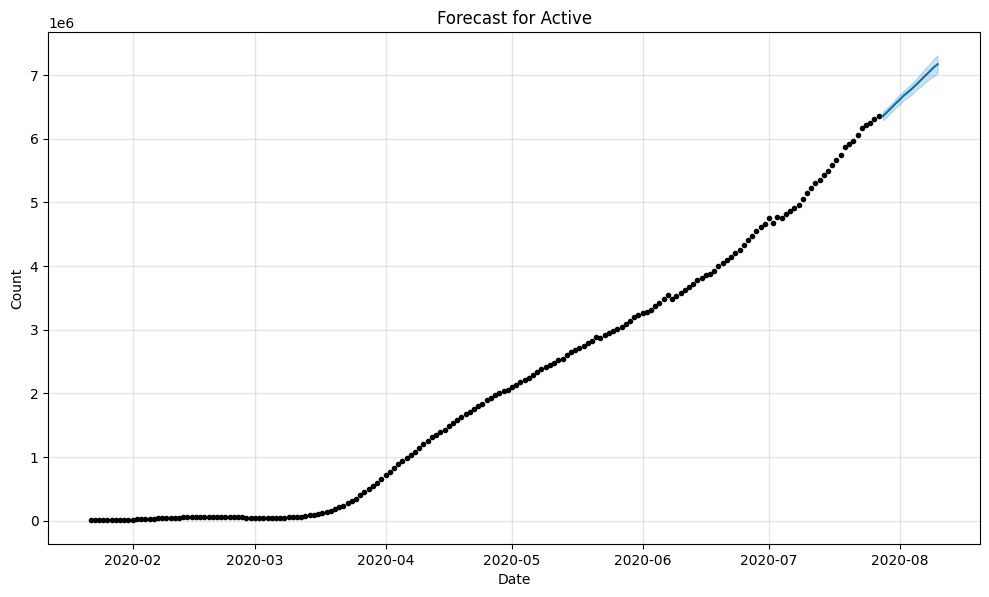

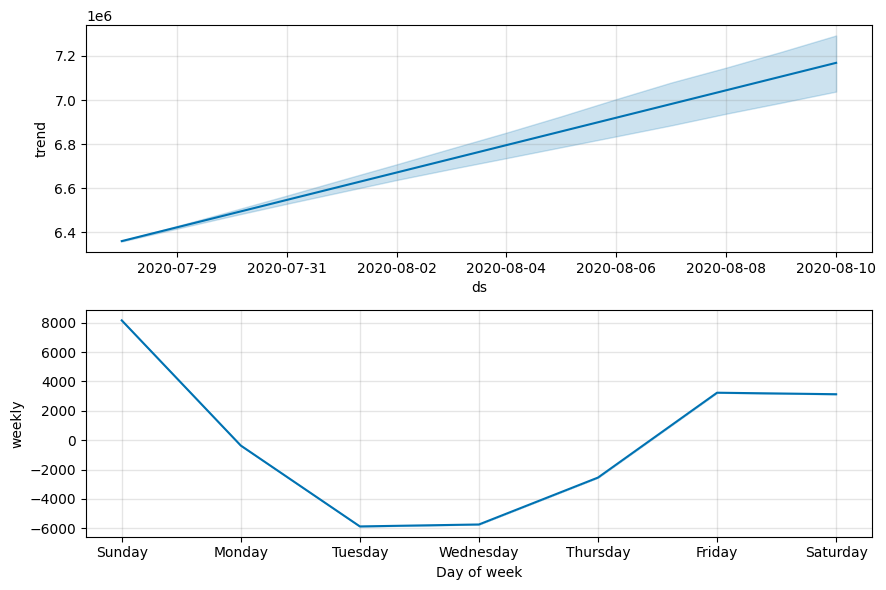

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvjf7x_75/2kez1_ur.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvjf7x_75/5z3_l6j7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82933', 'data', 'file=/tmp/tmpvjf7x_75/2kez1_ur.json', 'init=/tmp/tmpvjf7x_75/5z3_l6j7.json', 'output', 'file=/tmp/tmpvjf7x_75/prophet_model5s1zexy2/prophet_model-20240324121132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:11:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:11:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Forecast Data for Recovered:
           ds      yhat  yhat_lower  yhat_upper
0  2020-07-28   9311027     9197055     9433197
1  2020-07-29   9453130     9327925     9582777
2  2020-07-30   9595783     9479595     9717012
3  2020-07-31   9737182     9608085     9864218
4  2020-08-01   9877343     9744249     9999236
5  2020-08-02  10003318     9878013    10121739
6  2020-08-03  10139818    10020097    10258955
7  2020-08-04  10266932    10134311    10393547
8  2020-08-05  10409034    10260761    10550474
9  2020-08-06  10551687    10409658    10698644
10 2020-08-07  10693086    10532294    10855364
11 2020-08-08  10833247    10660868    11011362
12 2020-08-09  10959222    10771472    11146118
13 2020-08-10  11095722    10895507    11284512


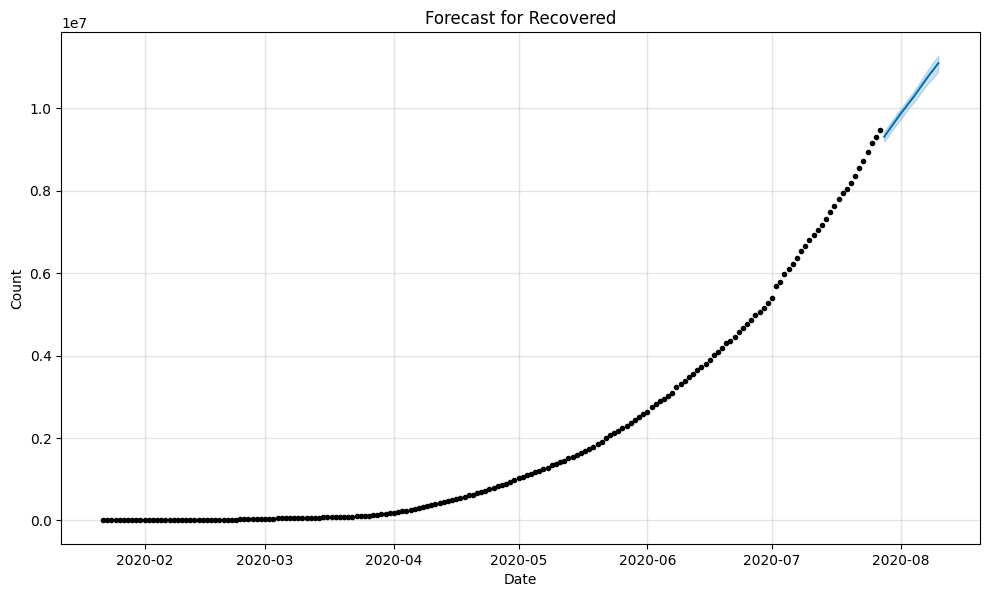

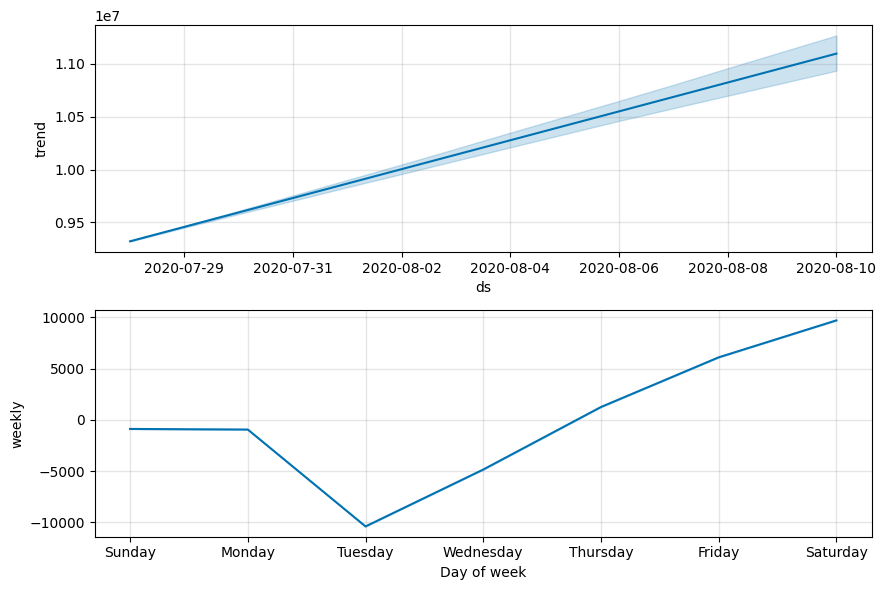

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvjf7x_75/vxkmfryx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvjf7x_75/fe_kkcwv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25550', 'data', 'file=/tmp/tmpvjf7x_75/vxkmfryx.json', 'init=/tmp/tmpvjf7x_75/fe_kkcwv.json', 'output', 'file=/tmp/tmpvjf7x_75/prophet_modelh1dphrpk/prophet_model-20240324121132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:11:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:11:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Forecast Data for Deaths:
           ds    yhat  yhat_lower  yhat_upper
0  2020-07-28  652315      649143      655265
1  2020-07-29  657882      654705      660907
2  2020-07-30  663491      660244      666809
3  2020-07-31  669006      665500      672323
4  2020-08-01  673888      669989      677983
5  2020-08-02  678025      672822      682559
6  2020-08-03  682315      676022      688218
7  2020-08-04  687521      680824      694612
8  2020-08-05  693087      684613      701398
9  2020-08-06  698697      689220      708793
10 2020-08-07  704212      693274      715440
11 2020-08-08  709094      697629      720892
12 2020-08-09  713231      699806      727804
13 2020-08-10  717521      701432      732741


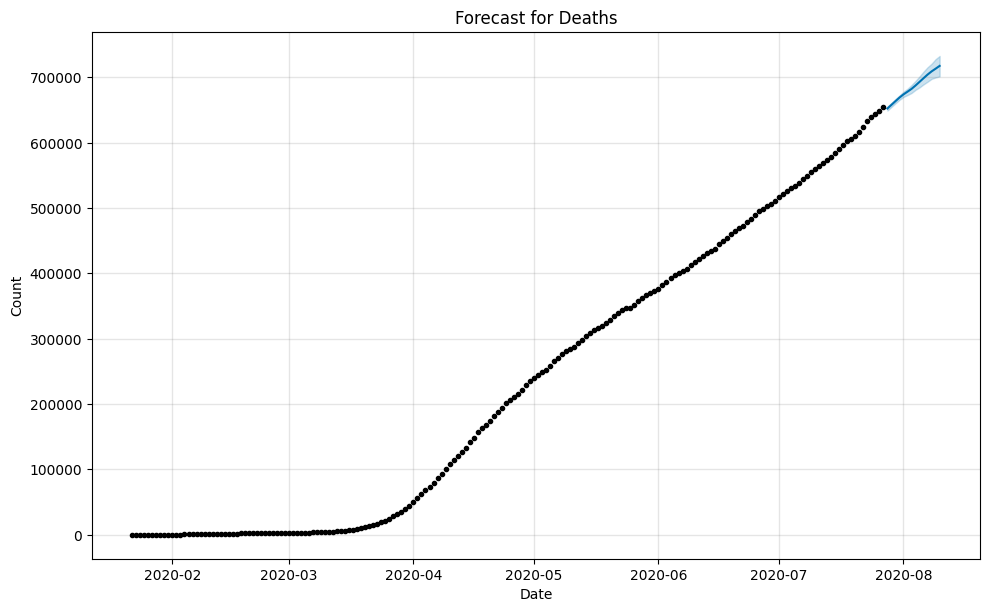

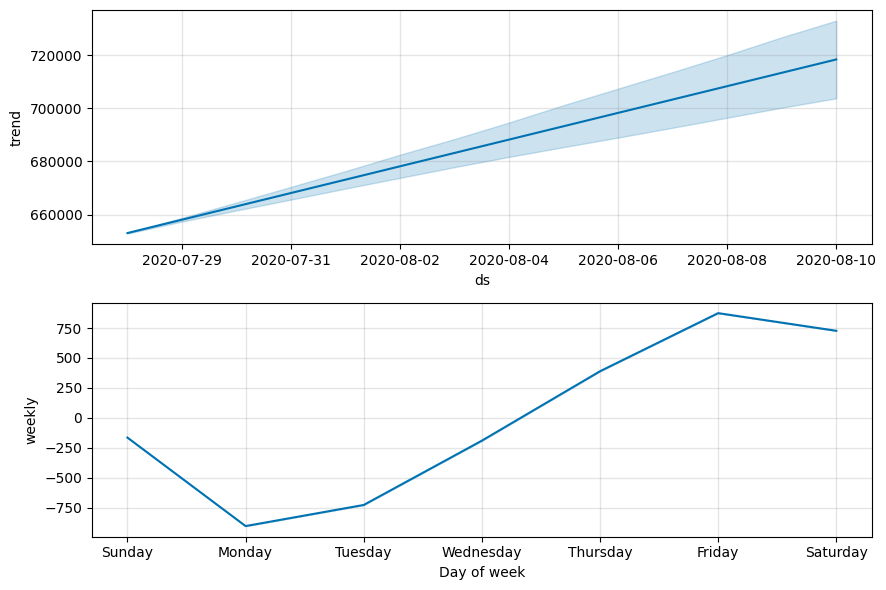


Final Forecasted DataFrame:


,date,confirmed,active,recovered,deaths
0,2020-07-28,16320199,6353415,9311027,652315
1,2020-07-29,16529972,6415814,9453130,657882
2,2020-07-30,16743908,6481273,9595783,663491
3,2020-07-31,16959097,6549315,9737182,669006
4,2020-08-01,17166757,6611479,9877343,673888
5,2020-08-02,17364296,6678771,10003318,678025
6,2020-08-03,17558885,6732521,10139818,682315
7,2020-08-04,17748132,6789287,10266932,687521
8,2020-08-05,17957905,6851686,10409034,693087
9,2020-08-06,18171841,6917145,10551687,698697


In [36]:
# Grouping data by 'date' and summing for each category
confirmed_cases = df.groupby('date').sum()['confirmed'].reset_index()
recovered_cases = df.groupby('date').sum()['recovered'].reset_index()
active_cases = df.groupby('date').sum()['active'].reset_index()
deaths_cases = df.groupby('date').sum()['deaths'].reset_index()

# Renaming columns for Prophet
confirmed_cases.columns = ['ds', 'y']
recovered_cases.columns = ['ds', 'y']
active_cases.columns = ['ds', 'y']
deaths_cases.columns = ['ds', 'y']

# Creating empty dataframes to store forecasted values
forecasted_df = pd.DataFrame(columns=['date', 'confirmed', 'active', 'recovered', 'deaths'])

# Creating a loop for each category: 'Confirmed', 'Active', 'Recovered', 'Deaths'
for category, data in zip(['Confirmed', 'Active', 'Recovered', 'Deaths'],
                          [confirmed_cases, active_cases, recovered_cases, deaths_cases]):
    print(f"\nForecast Data for {category}:")

    # Convert 'ds' to datetime
    data['ds'] = pd.to_datetime(data['ds'])

    # Creating the Prophet model
    model = Prophet(interval_width=0.95)
    model.fit(data)

    # Creating future dates for forecasting (from '2020-07-28' to '2020-08-10')
    future = model.make_future_dataframe(periods=14, freq='D', include_history=False)

    # Predicting the future
    forecast = model.predict(future)

    # Converting 'yhat', 'yhat_lower', and 'yhat_upper' to integers
    forecast[['yhat', 'yhat_lower', 'yhat_upper']] = forecast[['yhat', 'yhat_lower', 'yhat_upper']].astype(int)

    # Printing forecasted values for 'yhat', 'yhat_lower', 'yhat_upper'
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

    # Plotting the forecast
    fig = model.plot(forecast)
    plt.title(f'Forecast for {category}')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.show()

    # Plotting the forecast components
    fig = model.plot_components(forecast)
    plt.show()

    # Appending the forecasted values to the final dataframe
    forecasted_df[category.lower()] = forecast['yhat']

# Adding the 'date' column to the final dataframe
forecasted_df['date'] = forecast['ds']

# Filtering the final dataframe for the desired date range
forecasted_df = forecasted_df[(forecasted_df['date'] >= '2020-07-28') & (forecasted_df['date'] <= '2020-08-10')]

# Printing the final forecasted dataframe
print("\nFinal Forecasted DataFrame:")
forecasted_df